In [215]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from PIL import ImageDraw
sys.path.append('..')
from utilitaire.imgAiTrainer.imgAiTrainer import Trainer

tr = Trainer()

In [216]:
def show_sample(img):
  figure, axis = plt.subplots(1,1)
  axis.imshow(img)

In [217]:
def show_sample2(img,img2):
  figure, (axis1, axis2) = plt.subplots(1,2)
  axis1.imshow(img)
  axis2.imshow(img2)

In [218]:
model = keras.models.load_model('save/model/model')
model.load_weights('save/poids/model')

(1, 120, 160, 3)

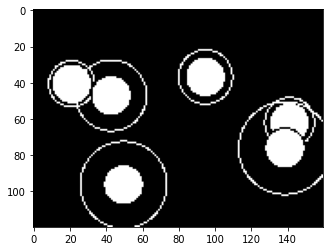

In [243]:
cercleT = tr.createMultiCercle((800,600),6)

img = tf.keras.preprocessing.image.load_img("../../Assets/imgAiTrainer/multiCercle.png",target_size=(120,160))
img = keras.preprocessing.image.img_to_array(img)
show_sample(img/255.)
imgIa = np.expand_dims(img, axis=0)
imgIa.shape

In [244]:
%%time
y_pred = model.predict(imgIa)

Wall time: 113 ms


In [245]:
print("Prédiction : ",y_pred)
print("Image : ",cercleT[0],cercleT[1],cercleT[2],cercleT[3],cercleT[4])

Prédiction :  [[5.8233264e+02 2.0402481e+02 6.7811523e+01 8.0578346e+01 2.3909757e-01]]
Image :  106.5 205.5 57.5 65.5 1


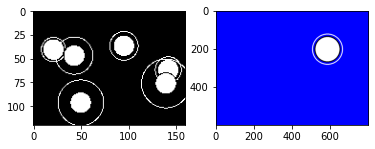

In [246]:
pred=y_pred[0]
imgIA = Image.new('RGBA', (800,600),"blue" )
draw = ImageDraw.Draw(imgIA)
if pred[0]<10000:
    draw.ellipse([round(pred[0]-pred[2]),round(pred[1]-pred[2]),round(pred[0]+pred[2]),round(pred[1]+pred[2])], fill = 'white', outline ='black', width=5)
    draw.ellipse([round(pred[0]-pred[3]),round(pred[1]-pred[3]),round(pred[0]+pred[3]),round(pred[1]+pred[3])], fill = None, outline ='white', width=5)
imgPre = tf.keras.preprocessing.image.img_to_array(imgIA, data_format=None, dtype=None)
show_sample2(img/255.,imgPre/255.)